In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/Digit_svm.csv")

In [52]:
df.shape

(42000, 785)

In [53]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


EDA


In [54]:
df.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

In [55]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [57]:
sorted_target= list(np.sort(df['label'].unique()))
print(sorted_target)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


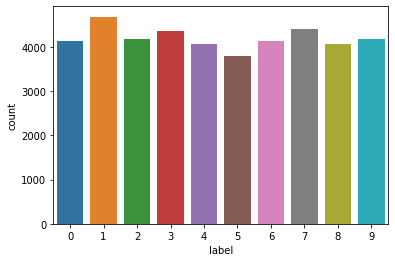

In [58]:
sns.countplot(df['label'])

In [59]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [60]:
# Plotting some samples as well as converting into matrix

four = df.iloc[3, 1:]
four.shape


(784,)

Text(0.5, 1.0, 'Digit 4')

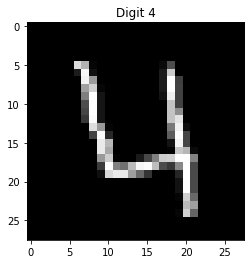

In [61]:
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [62]:
seven = df.iloc[6, 1:]
seven.shape


(784,)

Text(0.5, 1.0, 'Digit 7')

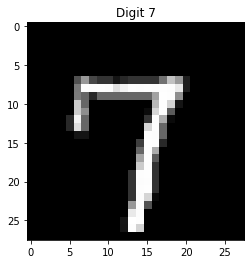

In [63]:
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

Data Preparation


In [64]:
round(df.drop('label',axis = 1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

Split features and target variable


In [65]:
x = df.drop(columns = 'label')
x.shape

(42000, 784)

In [66]:
y = df['label']
y.shape

(42000,)

In [67]:
#Normalisation
x = x/255

In [68]:
#scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(x)

In [69]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3,random_state = 10)

**Model Building,**
Method: 1 SVC Linear Model



In [70]:

from sklearn.svm import SVC

In [71]:
# linear model
model_linear = SVC(kernel='linear')

In [72]:
model_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
# predict
y_pred = model_linear.predict(X_test)

In [74]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [75]:
accuracy_score = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_score

0.9163492063492064

In [76]:
accuracy_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
accuracy_matrix

array([[1155,    0,    6,    2,    3,    7,    8,    2,    4,    1],
       [   0, 1386,    4,    3,    2,    1,    0,    3,   14,    0],
       [   9,   16, 1154,   23,   11,    6,    6,    7,   23,    5],
       [   7,    5,   42, 1207,    1,   44,    2,    4,   15,    4],
       [   4,    5,   14,    5, 1143,    2,    5,    3,    3,   34],
       [   5,   17,   13,   65,    5,  982,   12,    2,   36,   12],
       [  12,    1,   20,    0,   10,   16, 1159,    0,    1,    0],
       [   1,    7,   13,   13,   19,    1,    1, 1240,    6,   29],
       [  10,   36,   24,   53,    9,   43,    7,    3, 1017,   15],
       [   7,    6,    9,   24,   57,    3,    0,   52,   14, 1103]])

Method:2 SVC Non Linear Model

In [77]:
non_linear_model = SVC(kernel='rbf')

In [78]:
# fit
non_linear_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
# predict
y_pred = non_linear_model.predict(X_test)

In [80]:
accuracy_score = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_score

0.9557936507936508

In [81]:
accuracy_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
accuracy_matrix

array([[1169,    0,    3,    1,    0,    0,    5,    5,    5,    0],
       [   0, 1392,    6,    3,    2,    0,    1,    5,    4,    0],
       [   3,    3, 1208,    9,    5,    1,    6,   18,    7,    0],
       [   1,    1,   16, 1266,    1,   11,    1,   24,    8,    2],
       [   1,    3,   14,    0, 1167,    2,    8,    8,    2,   13],
       [   0,    3,    2,   19,    3, 1088,   11,   10,    9,    4],
       [   9,    1,    7,    0,    2,    7, 1175,   15,    3,    0],
       [   2,    9,    6,    2,   11,    1,    1, 1280,    1,   17],
       [   4,   14,   12,   18,    7,   12,    2,   10, 1129,    9],
       [   3,    3,    4,   22,   21,    1,    0,   45,    7, 1169]])

Method 3: RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
y_pred = model.predict(X_test)

In [86]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
accuracy_score

0.9628571428571429

In [87]:
accuracy_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy_matrix

array([[1168,    0,    0,    1,    2,    2,    7,    0,    7,    1],
       [   0, 1393,    6,    3,    4,    0,    1,    2,    3,    1],
       [   3,    4, 1210,    4,    9,    2,    6,   12,   10,    0],
       [   2,    1,   21, 1271,    1,   20,    1,    3,    7,    4],
       [   2,    1,    3,    0, 1193,    0,    5,    3,    1,   10],
       [   1,    3,    0,   21,    1, 1098,   10,    1,   10,    4],
       [   6,    2,    1,    0,    1,   10, 1193,    0,    6,    0],
       [   2,    9,   13,    3,    9,    1,    0, 1277,    1,   15],
       [   0,   12,   16,   12,    7,   10,    8,    1, 1135,   16],
       [   4,    3,    3,   22,   19,    4,    0,   17,    9, 1194]])

**Summary:**
Best Classification Model for MNIST dataset is RandomForestClassifier with accuracy score of 0.9628

In [89]:
print("Model Name -SVC Linear Model, Accuracy_sore : 0.9163492063492064")
print("Model Name -SVC Non Linear Model, Accuracy_sore : 0.9557936507936508")
print("Model Name -RandomForestClassifier, Accuracy_sore : 0.9628571428571429")

Model Name -SVC Linear Model, Accuracy_sore : 0.9163492063492064
Model Name -SVC Non Linear Model, Accuracy_sore : 0.9557936507936508
Model Name -RandomForestClassifier, Accuracy_sore : 0.9628571428571429
